In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(EnhancedVolcano)
    library(ggrepel)
    library(patchwork)
})

In [2]:
data_path <- "/home/ubuntu/data/bioinfo_sm207"


In [3]:
rchop_res <- read.csv(file.path(data_path, "step07_rchop_results.csv"), row.names = 1)
rchop_res


,P.value..Log.rank._schmitz,Hazard.Ratio_schmitz,P.value..Log.rank._reddy,Hazard.Ratio_reddy
,<dbl>,<dbl>,<dbl>,<dbl>
B.Memory,0.01347249,0.6159364,0.69586425,0.9400498
B.Naive,0.88413629,0.9721975,0.58414330,1.0910479
Basophils.LD,0.61293907,0.8456450,0.18400325,0.6203123
MAIT,0.99331113,0.9981489,0.30253082,1.1787136
mDCs,0.71997783,1.0721670,0.10474840,1.3142316
Monocytes.C,0.65154135,0.9150365,0.28207559,1.1895957
Monocytes.NC.I,0.98145897,0.9954090,0.36439695,1.1551464
Neutrophils.LD,0.06468359,0.6985722,0.95398380,1.0094253
NK,0.70990237,1.1316978,0.96898273,0.9914687


In [4]:
rchop_res$celltype <- rownames(rchop_res)

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


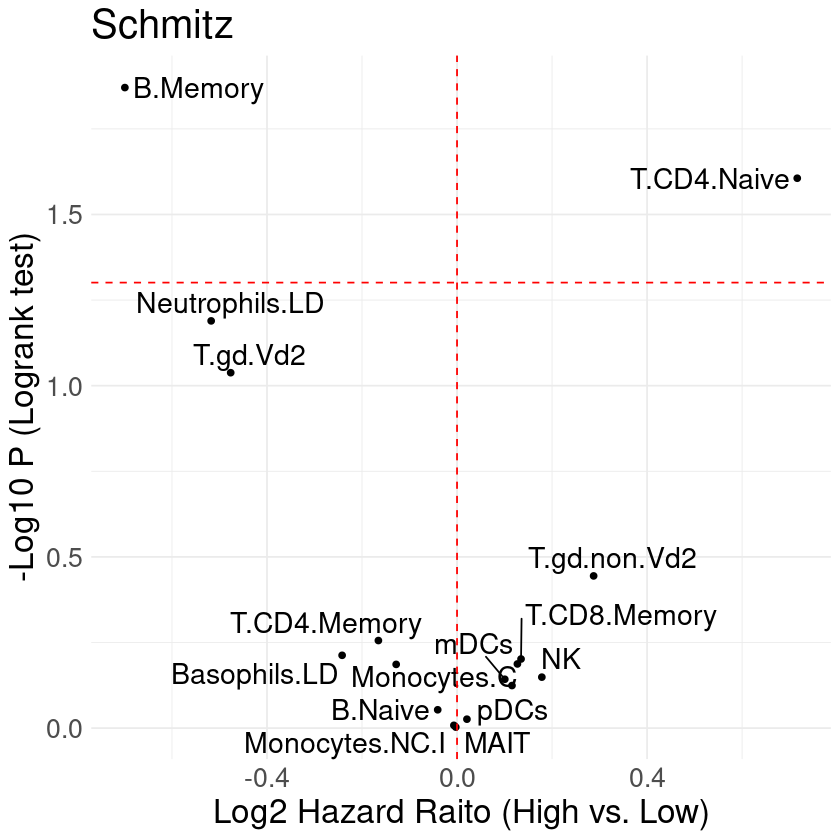

In [5]:
p1 <- ggplot(rchop_res, aes(
    x = log2(Hazard.Ratio_schmitz),
    y = -log10(P.value..Log.rank._schmitz),
    label = celltype
)) +
    geom_point() +
    theme_minimal() +
    geom_text_repel(size = 6) +
    geom_hline(yintercept = -log10(0.05), col = "red", linetype = "dashed") +
    geom_vline(xintercept = 0, col = "red", linetype = "dashed") +
    xlab("Log2 Hazard Raito (High vs. Low)") +
    ylab("-Log10 P (Logrank test)") +
    theme(
        text = element_text(size = 20),
        axis.text = element_text(size = 16)
    ) +
    ggtitle("Schmitz")
p1

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


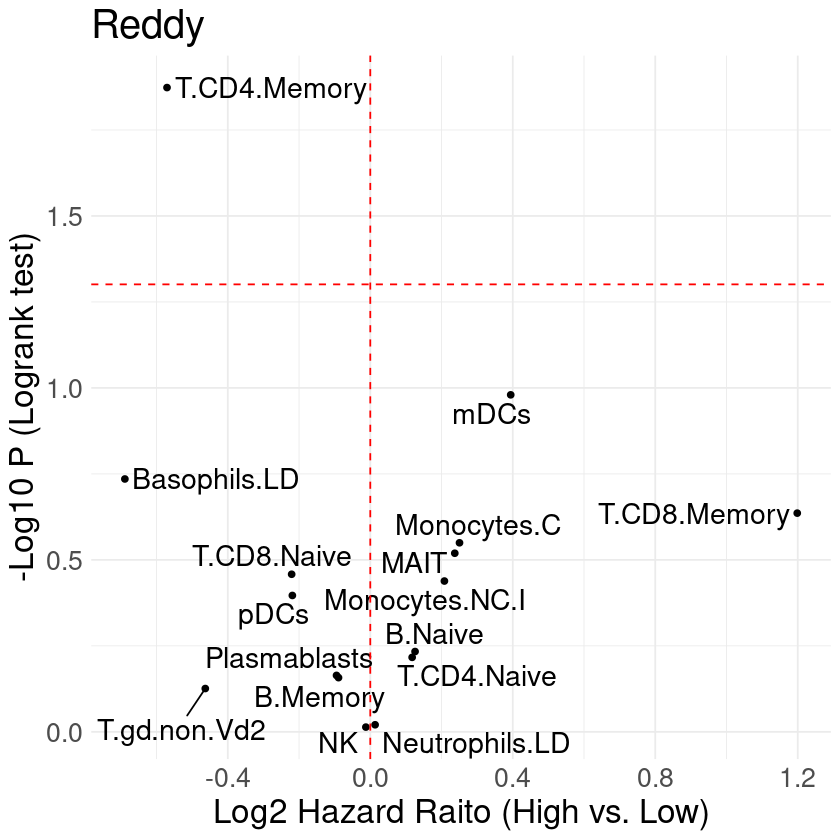

In [6]:
p2 <- ggplot(rchop_res, aes(
    x = log2(Hazard.Ratio_reddy),
    y = -log10(P.value..Log.rank._reddy),
    label = celltype
)) +
    geom_point() +
    theme_minimal() +
    geom_text_repel(size = 6) +
    geom_hline(yintercept = -log10(0.05), col = "red", linetype = "dashed") +
    geom_vline(xintercept = 0, col = "red", linetype = "dashed") +
    xlab("Log2 Hazard Raito (High vs. Low)") +
    ylab("-Log10 P (Logrank test)") +
    theme(
        text = element_text(size = 20),
        axis.text = element_text(size = 16)
    ) +
    ggtitle("Reddy")
p2

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


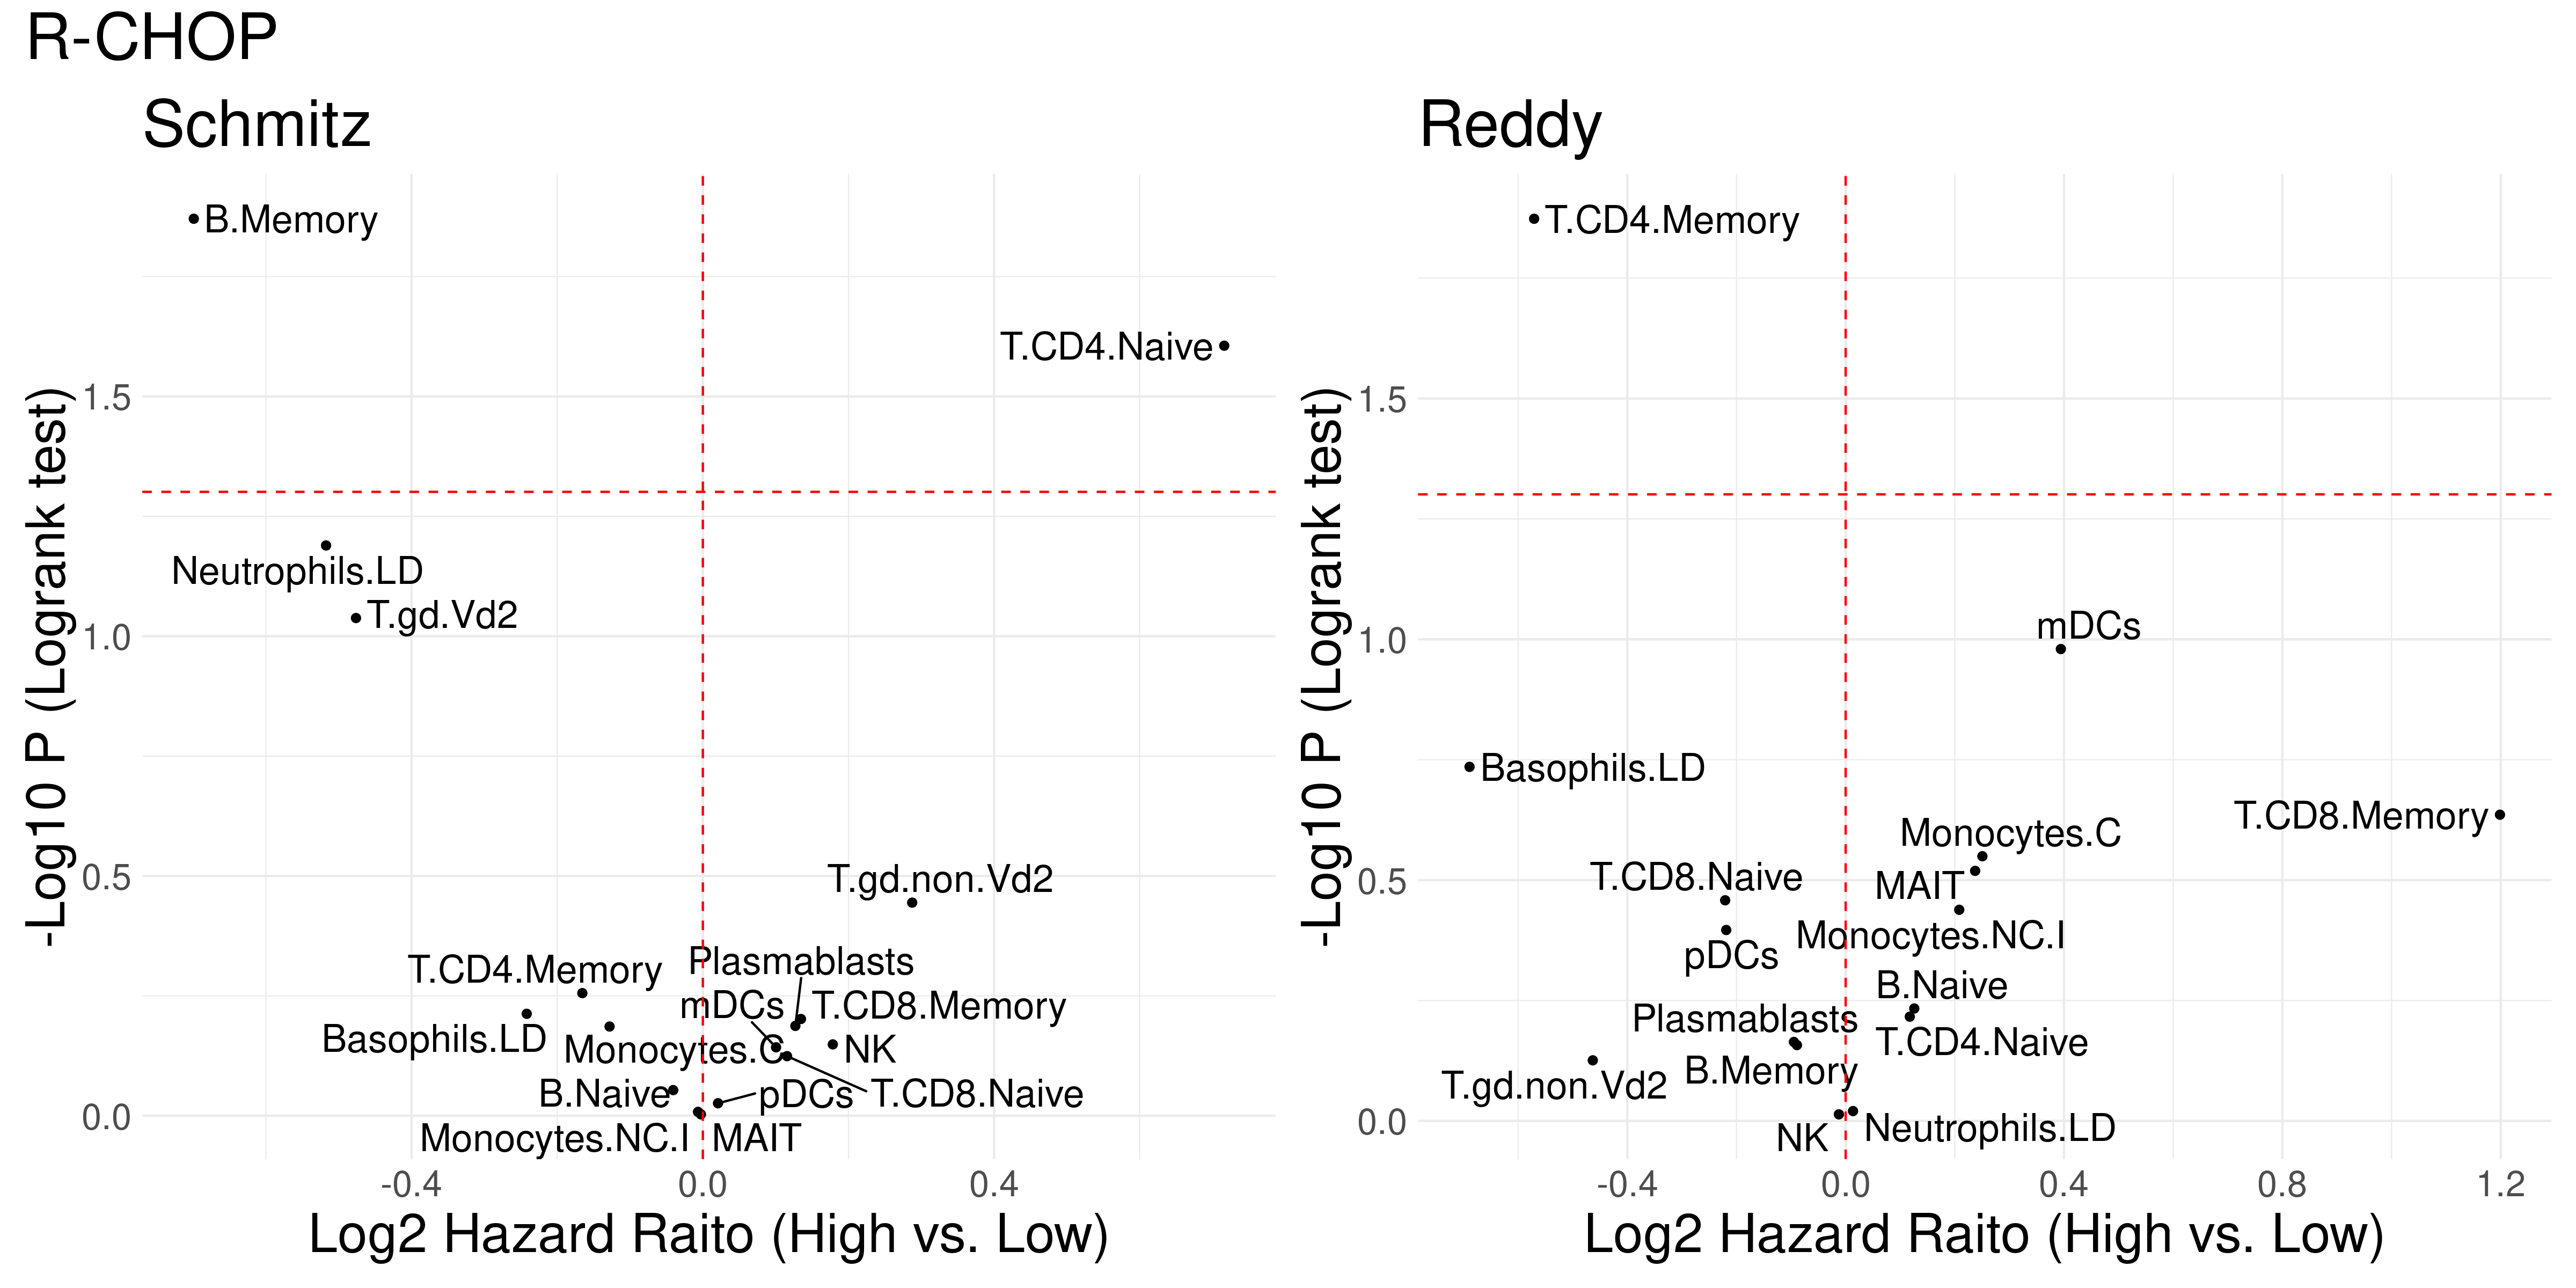

In [7]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 300)
p1+p2+plot_annotation(title="R-CHOP") & theme(title=element_text(size=24))